# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import tensorflow as tf
import pickle
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import random
import csv
from os import listdir
from os.path import isfile, join

# from cv2 import resize


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file= 'dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of possible classes =", n_classes)
print("Image data shape =", image_shape)

Number of training examples = 34799
Number of testing examples = 12630
Number of possible classes = 43
Image data shape = (32, 32, 3)


### Exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

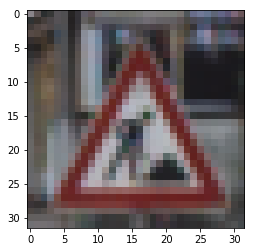

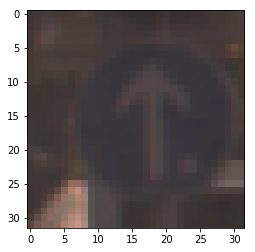

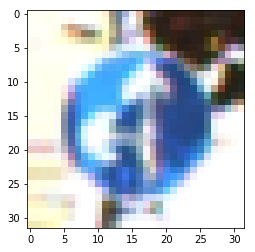

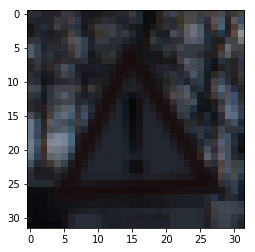

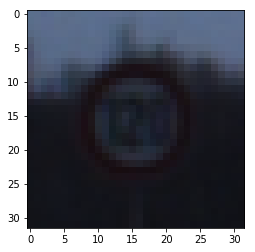

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

# Simple random plots of the training dataset
for i in range(5):
    plt.figure()
    plt.imshow(train['features'][np.random.randint(n_train)])
    plt.savefig("image_samples/sample"+str(i)+".jpeg")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [98]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def resize_image(image):
    return scipy.misc.imresize(image, (32,32))

# Normalize the data
def normalize(image):
    return image/255.0 - 0.5
    

# taken from http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def preproccess(images):
    ims = []
    for image in images:
        im = resize_image(image)
        im = rgb2gray(im)
        im = normalize(im)
        ims.append(im)
    ims = np.expand_dims(ims, axis=4)
    return np.array(ims)


proccessed_train_x = preproccess(train['features'])
proccessed_valid_x = preproccess(valid['features'])
proccessed_test_x = preproccess(test['features'])

print(proccessed_train_x.shape)
print(proccessed_valid_x.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)


Now let's visualize the pictures after preproccessing!

(3, 32, 32, 1)


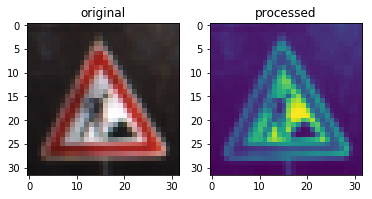

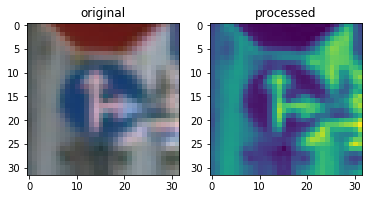

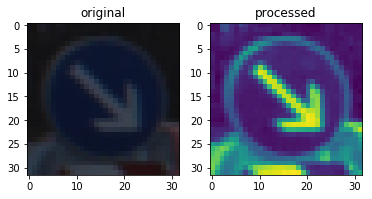

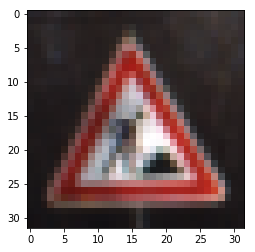

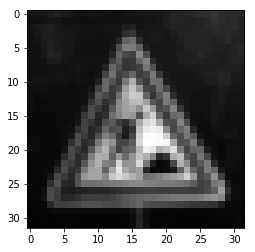

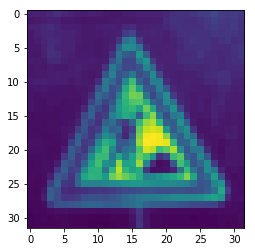

In [97]:

indecies = random.sample(range(n_train), 3)
sample_images = train['features'][indecies]
sample_processed_images = proccessed_train_x[indecies, :, :]
print(sample_processed_images.shape)

# show the iamge and their processes counterpart
for image, processed in zip(sample_images, sample_processed_images):
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(image)
    axarr[0].set_title('original')
    axarr[1].imshow(processed[:,:,0])
    axarr[1].set_title('processed')

plt.figure()
plt.imshow(resize_image(sample_images[0]))
plt.savefig("image_samples/resized.jpeg")

plt.figure()
plt.imshow(rgb2gray(resize_image(sample_images[0])), cmap="gray")
plt.savefig("image_samples/gray.jpeg")

plt.figure()
plt.imshow(normalize(rgb2gray(resize_image(sample_images[0]))))
plt.savefig("image_samples/normalized.jpeg")

### Model Architecture

In [65]:
# Hyperparameters
learning_rate = 0.001
num_epochs = 150
batch_size = 100

mu = 0
sigma = 0.1
keep_prob = 0.2

In [77]:
# construct the computation graph here
G = tf.Graph()

tf.reset_default_graph()

with G.as_default():
    ### Define your architecture here.
    ### Feel free to use as many code cells as needed.
    def convolution(X, W, b, stride, padding="SAME"):
        X = tf.nn.conv2d(X, W, stride, padding)
        tf.nn.bias_add(X, b)
        return X

    def maxpool(X, k=2):
        X = tf.nn.max_pool(X, ksize=[1,k,k,1], strides = [1,k,k,1], padding="VALID")
        return X    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

    hidden_nodes_1 = 120
    hidden_nodes_2 = 84

    X = tf.placeholder(tf.float32, shape=(None, 32,32,1), name="input")
    Y = tf.placeholder(tf.int32, shape=(None))

    
    W_1 = tf.Variable(tf.random_normal([5,5,1,6], mean=mu, stddev=sigma), name="W_1")
    b_1 = tf.Variable(tf.random_normal([6], mean=mu, stddev=sigma), name="b_1")

    W_2 = tf.Variable(tf.random_normal([5,5,6,16], mean=mu, stddev=sigma), name="W_2")
    b_2 = tf.Variable(tf.random_normal([16], mean=mu, stddev=sigma), name="b_2")
    
    W_3 = tf.Variable(tf.random_normal([400, hidden_nodes_1], mean=mu, stddev=sigma), name="W_3")
    W_4 = tf.Variable(tf.random_normal([hidden_nodes_1, hidden_nodes_2], mean=mu, stddev=sigma), name="W_4")
    W_5 = tf.Variable(tf.random_normal([hidden_nodes_2, n_classes], mean=mu, stddev=sigma), name="W_5")

    b_3 = tf.Variable(tf.random_normal([hidden_nodes_1], mean=mu, stddev=sigma), name="b_3")
    b_4 = tf.Variable(tf.random_normal([hidden_nodes_2], mean=mu, stddev=sigma), name="b_4")
    b_5 = tf.Variable(tf.random_normal([n_classes], mean=mu, stddev=sigma), name="b_5")
    
    def LeNet(X):
        print("before Layer 1:",X.shape)
        # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #     x = tf.nn.dropout(x, keep_prob, noise_shape=None, seed=None, name=None)
        x = convolution(X, W_1, b_1, [1,1,1,1], padding='VALID')
        print("after Layer 1:",x.shape)

        # TODO: Activation.
        x = tf.nn.relu(x)

        # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
        x = maxpool(x)
        print("after pool 1, expected 14x14x6, really",x.shape)
    #     x = tf.nn.dropout(x, keep_prob, noise_shape=None, seed=None, name=None)

        # TODO: Layer 2: Convolutional. Output = 10x10x16.
        x = convolution(x, W_2, b_2, [1,1,1,1], padding="VALID")
        print("after layer 2, expected 10x10x16, really",x.shape)

        # TODO: Activation.
        x = tf.nn.relu(x)

        # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
        x = maxpool(x)
    #     x = tf.nn.dropout(x, keep_prob, noise_shape=None, seed=None, name=None)
        print("after pool 2, expected 5x5x16, really",x.shape)

        # TODO: Flatten. Input = 5x5x16. Output = 400.
        x = tf.reshape(x, (-1, 400))
        print("after flatenning, expected 400, really", x.shape)

        # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
        x = tf.add(tf.matmul(x, W_3), b_3)
        print("after layer 3, expected 120, really", x.shape)

        # TODO: Activation.
        x = tf.nn.relu(x)
    #     x = tf.nn.dropout(x, keep_prob, noise_shape=None, seed=None, name=None)

        # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
        x = tf.add(tf.matmul(x, W_4), b_4)
        print("after layer 4, expected 84, really", x.shape)

        # TODO: Activation.
        x = tf.nn.relu(x)

        # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
        logits = tf.add(tf.matmul(x, W_5), b_5)
        print("after layer 5, expected", n_classes, "really", x.shape)
        
        return logits
    
    logits = LeNet(X)
    onehot = tf.one_hot(Y, n_classes)

    # declare the architecture and optimization
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=onehot)
    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training = optimizer.minimize(loss)
    
    # Model evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(onehot, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # defines the saver for the tensorflow model
    saver = tf.train.Saver()

before Layer 1: (?, 32, 32, 1)
after Layer 1: (?, 28, 28, 6)
after pool 1, expected 14x14x6, really (?, 14, 14, 6)
after layer 2, expected 10x10x16, really (?, 10, 10, 16)
after pool 2, expected 5x5x16, really (?, 5, 5, 16)
after flatenning, expected 400, really (?, 400)
after layer 3, expected 120, really (?, 120)
after layer 4, expected 84, really (?, 84)
after layer 5, expected 43 really (?, 84)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [78]:
# The evaluation function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, Y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [80]:
validation_scores = []
print("learning with:")
print("learning rate: ", learning_rate)
print("epoch number:", num_epochs)
print("batch size:", batch_size)


with tf.Session(graph=G) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(proccessed_train_x)
    
    print("Training...")
    for i in range(num_epochs):
        X_train, y_train = shuffle(proccessed_train_x, train['labels'])
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training, feed_dict={X: batch_x, Y: batch_y})
            
        validation_accuracy = evaluate(proccessed_valid_x, valid['labels'])
        validation_scores.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

learning with:
learning rate:  0.001
epoch number: 150
batch size: 100
Training...
EPOCH 1 ...
Validation Accuracy = 0.745

EPOCH 2 ...
Validation Accuracy = 0.820

EPOCH 3 ...
Validation Accuracy = 0.862

EPOCH 4 ...
Validation Accuracy = 0.884

EPOCH 5 ...
Validation Accuracy = 0.902

EPOCH 6 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.907

EPOCH 8 ...
Validation Accuracy = 0.893

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.913

EPOCH 11 ...
Validation Accuracy = 0.912

EPOCH 12 ...
Validation Accuracy = 0.910

EPOCH 13 ...
Validation Accuracy = 0.912

EPOCH 14 ...
Validation Accuracy = 0.907

EPOCH 15 ...
Validation Accuracy = 0.918

EPOCH 16 ...
Validation Accuracy = 0.912

EPOCH 17 ...
Validation Accuracy = 0.915

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 19 ...
Validation Accuracy = 0.912

EPOCH 20 ...
Validation Accuracy = 0.928

EPOCH 21 ...
Validation Accuracy = 0.926

EPOCH 22 ...
Validation Accuracy = 0.917

EP

### Analyze Performance
Now we will analyze the performance of this network by seeing the plot of validation loss with each epoch. Is our number of epochs too big, leading the validation loss to incrase over time after a certain point, or is it too small, leading to a not-finished plateau?

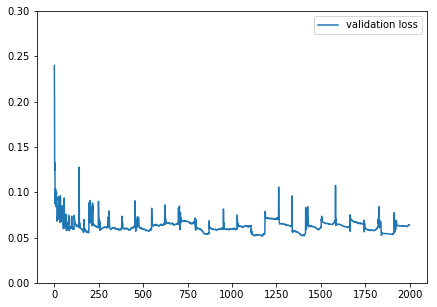

In [64]:
# Epochs | learning_rate | hidden_layer | batch_size | validation_loss
# 500    | 0.001         | 400->120->84 |   1024     | 0.0680272125333
# 500    | 0.001        |  400->250->120 |    1024     | 0.0659863956661
# 41    | 0.001        |  400->250->120 |    10     | 0.086
# 177    | 0.002        |  400->250->120 |    128    | 0.136
# 500    | 0.002        |  400->120->84 |    128    | 0.074
# 2000    | 0.001        |  400->120->84 |    512    | 0.134920637191 (drop after relu of 4th layer)

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
validation_loss = [1. - acc for acc in validation_scores]
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(7,5))
h = plt.plot(validation_loss, label = "validation loss")
plt.legend(handles=h)
axes = plt.gca()
axes.set_ylim([0,0.3])
plt.savefig("validation_loss.jpeg")

As can be seen from the validaiton loss plot, the model learns quite a lot in the first 100-150 epochs, but then begins to drop in performance, as indicated by the rise of the validation loss agian. This is mainly a sign of overfitting. Therefore, we will train again using only 150 epochs!

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

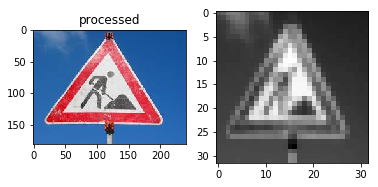

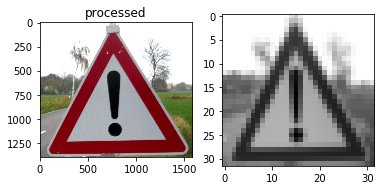

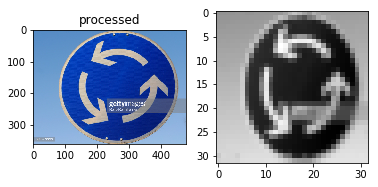

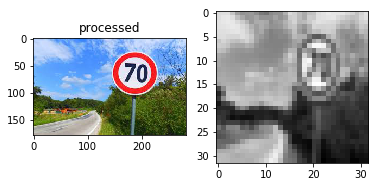

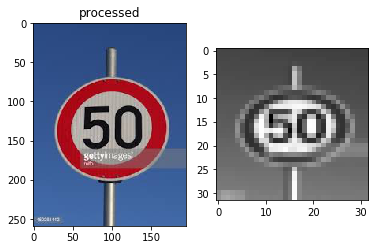

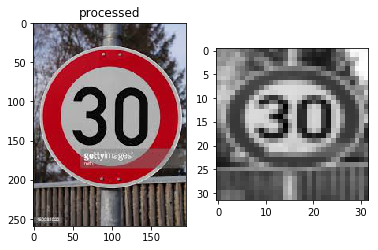

In [81]:
def get_mappings_from_csv(filename):
    file = open(filename, 'r')
    reader = csv.reader(file)
    index = []
    meaning = []
    next(reader) #read the first line
    for line in reader:
        index.append(line[0])
        meaning.append(line[1])
        
    return dict(zip(index,meaning))

# Set up the mapping from numbers to actual sign names
index_to_sign = get_mappings_from_csv("signnames.csv")
    
# load the iamges
web_images_folder = "web_test_images"
image_files = [web_images_folder+"/"+f for f in listdir(web_images_folder) if isfile(join(web_images_folder, f))]

# preproccess the images
images = [mpimg.imread(file) for file in image_files]
processes_images = preproccess(images)

# show the iamge and their processes counterpart
for image, processed in zip(images, processes_images):
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(image)
    axarr[0].set_title('original')
    axarr[1].imshow(processed[:,:,0], cmap="gray")
    axarr[0].set_title('processed')

### Predict the Sign Type for Each Image

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

before Layer 1: (?, 32, 32, 1)
after Layer 1: (?, 28, 28, 6)
after pool 1, expected 14x14x6, really (?, 14, 14, 6)
after layer 2, expected 10x10x16, really (?, 10, 10, 16)
after pool 2, expected 5x5x16, really (?, 5, 5, 16)
after flatenning, expected 400, really (?, 400)
after layer 3, expected 120, really (?, 120)
after layer 4, expected 84, really (?, 84)
after layer 5, expected 43 really (?, 84)


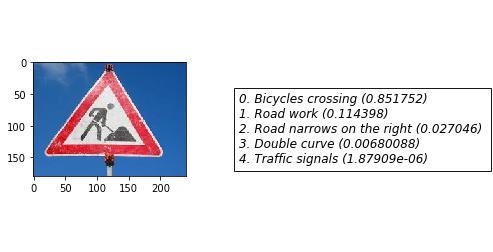

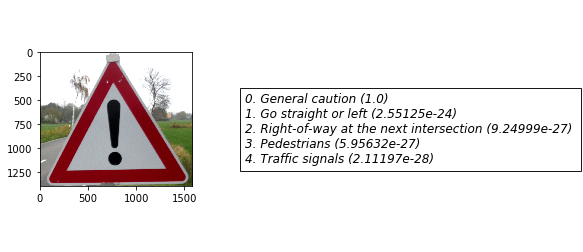

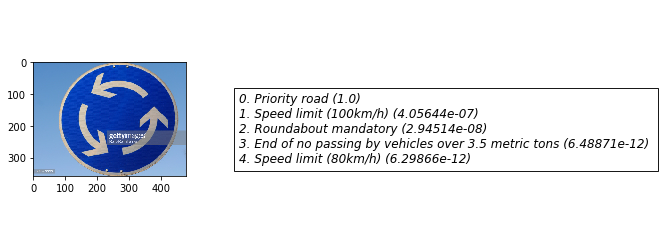

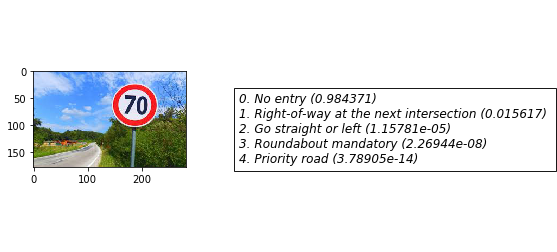

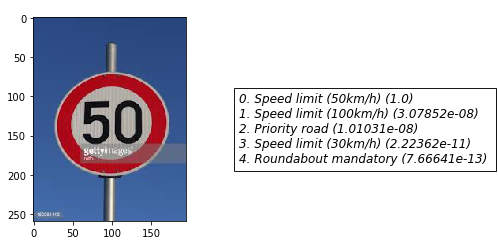

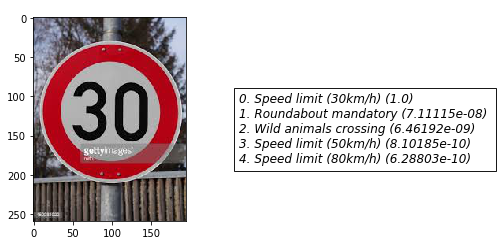

In [119]:
# reset the graph
tf.reset_default_graph()

# open up a session and restore the model
with tf.Session() as sess:    
    
    # Declare the variables so loader can see them
    mu = 0
    sigma = 0.1
    keep_prob = 0.2

    hidden_nodes_1 = 120
    hidden_nodes_2 = 84
    
    X = tf.placeholder(tf.float32, shape=(None, 32,32,1), name="input")
    Y = tf.placeholder(tf.int32, shape=(None))
    
    W_1 = tf.Variable(tf.random_normal([5,5,1,6], mean=mu, stddev=sigma), name="W_1")
    b_1 = tf.Variable(tf.random_normal([6], mean=mu, stddev=sigma), name="b_1")

    W_2 = tf.Variable(tf.random_normal([5,5,6,16], mean=mu, stddev=sigma), name="W_2")
    b_2 = tf.Variable(tf.random_normal([16], mean=mu, stddev=sigma), name="b_2")
    
    W_3 = tf.Variable(tf.random_normal([400, hidden_nodes_1], mean=mu, stddev=sigma), name="W_3")
    W_4 = tf.Variable(tf.random_normal([hidden_nodes_1, hidden_nodes_2], mean=mu, stddev=sigma), name="W_4")
    W_5 = tf.Variable(tf.random_normal([hidden_nodes_2, n_classes], mean=mu, stddev=sigma), name="W_5")

    b_3 = tf.Variable(tf.random_normal([hidden_nodes_1], mean=mu, stddev=sigma), name="b_3")
    b_4 = tf.Variable(tf.random_normal([hidden_nodes_2], mean=mu, stddev=sigma), name="b_4")
    b_5 = tf.Variable(tf.random_normal([n_classes], mean=mu, stddev=sigma), name="b_5")
    
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet")

    
    # define the procedures we want to carry out.
    logits = LeNet(X)
    soft_max = tf.nn.softmax(logits)
    top_predictions = tf.nn.top_k(soft_max, 5)
    results = sess.run(top_predictions, feed_dict={X:processes_images})
    
    # split the top resutls into indecies and their corresponding probabilities.
    probs, indecies = results
    
    # plot the images with the top 5 probabilities of the sign.
    for image, prob, idxs in zip(images, probs, indecies):
        fig, axarr = plt.subplots(1, 2)
        
        # set up a title with the top sign predictions and their probabilities
        title = ""
        for i in range(5):
            title += str(i)+". " + index_to_sign[str(idxs[i])] + " ("+str(prob[i]) + ") \n"
        title = title[:-1] # remove trailing new line
        
        # display the title and hide the axes
        axarr[1].text(0.15, 0.3, title, style='italic', fontsize=12, bbox={'facecolor':'white', 'alpha':0.9, 'pad':5})
        plt.gca().axison = False

        #display the image for the prediction
        axarr[0].imshow(image)

#### Evaluate on train, validation, and test sets
Now, we will evaluate the modle and get numerical quantifiers of our model's performance using the training, validaiton, and testing sets

In [120]:
# reset the graph
tf.reset_default_graph()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
#     sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, Y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# open up a session and restore the model
with tf.Session() as sess:    
    
    # Declare the variables so loader can see them
    mu = 0
    sigma = 0.1
    keep_prob = 0.2

    hidden_nodes_1 = 120
    hidden_nodes_2 = 84
    
    X = tf.placeholder(tf.float32, shape=(None, 32,32,1), name="input")
    Y = tf.placeholder(tf.int32, shape=(None))
    
    W_1 = tf.Variable(tf.random_normal([5,5,1,6], mean=mu, stddev=sigma), name="W_1")
    b_1 = tf.Variable(tf.random_normal([6], mean=mu, stddev=sigma), name="b_1")

    W_2 = tf.Variable(tf.random_normal([5,5,6,16], mean=mu, stddev=sigma), name="W_2")
    b_2 = tf.Variable(tf.random_normal([16], mean=mu, stddev=sigma), name="b_2")
    
    W_3 = tf.Variable(tf.random_normal([400, hidden_nodes_1], mean=mu, stddev=sigma), name="W_3")
    W_4 = tf.Variable(tf.random_normal([hidden_nodes_1, hidden_nodes_2], mean=mu, stddev=sigma), name="W_4")
    W_5 = tf.Variable(tf.random_normal([hidden_nodes_2, n_classes], mean=mu, stddev=sigma), name="W_5")

    b_3 = tf.Variable(tf.random_normal([hidden_nodes_1], mean=mu, stddev=sigma), name="b_3")
    b_4 = tf.Variable(tf.random_normal([hidden_nodes_2], mean=mu, stddev=sigma), name="b_4")
    b_5 = tf.Variable(tf.random_normal([n_classes], mean=mu, stddev=sigma), name="b_5")
    
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet")
    
    logits = LeNet(X)
    onehot = tf.one_hot(Y, n_classes)

    # declare the architecture and optimization
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=onehot)
    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training = optimizer.minimize(loss)
    
    # Model evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(onehot, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    
    training_accuracy = evaluate(proccessed_train_x, train['labels'])
    validation_accuracy = evaluate(proccessed_valid_x, valid['labels'])
    testing_accuracy = evaluate(proccessed_test_x, test['labels'])
    print("training accuracy:", training_accuracy)
    print("validaiton accuracy:", validation_accuracy)
    print("testing accuracy:", testing_accuracy)

before Layer 1: (?, 32, 32, 1)
after Layer 1: (?, 28, 28, 6)
after pool 1, expected 14x14x6, really (?, 14, 14, 6)
after layer 2, expected 10x10x16, really (?, 10, 10, 16)
after pool 2, expected 5x5x16, really (?, 5, 5, 16)
after flatenning, expected 400, really (?, 400)
after layer 3, expected 120, really (?, 120)
after layer 4, expected 84, really (?, 84)
after layer 5, expected 43 really (?, 84)
training accuracy: 0.999999992121
validaiton accuracy: 0.951473920524
testing accuracy: 0.936737952115


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [83]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess, feed_dict={X : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

outputFeatureMap(processes_images[0], W_1)

TypeError: eval() got an unexpected keyword argument 'feed_dict'

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 